6

Training data points
   X    Y  Class
0  1  1.0      1
1  1 -1.0      1
2  2  2.5      2
3  0  2.0      2
4  2  3.0      2
5  4  5.0      1


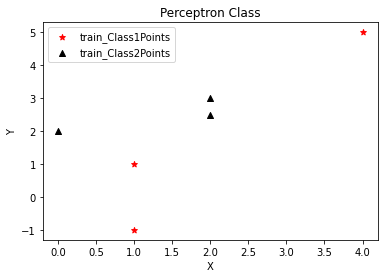

Higher Dimension points Y

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [-0.   -4.   -0.   -0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]]



		 Initial Weight Vector All One 
+-------------------------+---------------+----------------+
| Alpha ( Learning Rate ) | One at a Time | Many at a Time |
+-------------------------+---------------+----------------+
|           0.1           |       6       |      102       |
|           0.2           |       92      |      104       |
|           0.3           |      104      |       91       |
|           0.4           |      106      |      116       |
|           0.5           |       93      |      105       |
|           0.6           |       93      |      114       |
|           0.7           |      108      |       91       |
|           0.8           |      115      |       91       |
|           0.9           |   

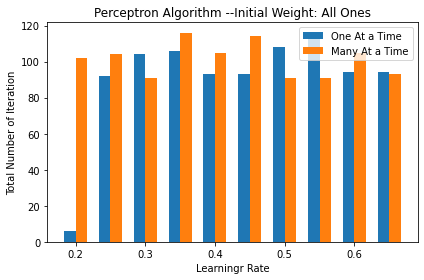





		 Initial Weight Vector All Zero 
+-------------------------+---------------+----------------+
| Alpha ( Learning Rate ) | One at a Time | Many at a Time |
+-------------------------+---------------+----------------+
|           0.1           |       94      |      105       |
|           0.2           |       94      |      105       |
|           0.3           |       94      |      105       |
|           0.4           |       94      |      105       |
|           0.5           |       94      |       92       |
|           0.6           |       94      |       92       |
|           0.7           |       94      |       92       |
|           0.8           |       94      |      105       |
|           0.9           |       94      |      105       |
|            1            |       94      |       92       |
+-------------------------+---------------+----------------+


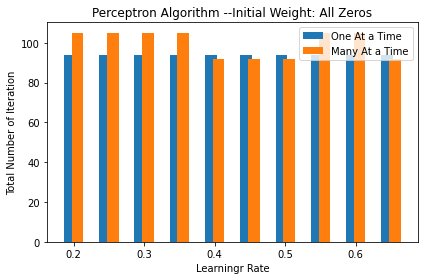





		 Initial Weight Vector All Random 
+-------------------------+---------------+----------------+
| Alpha ( Learning Rate ) | One at a Time | Many at a Time |
+-------------------------+---------------+----------------+
|           0.1           |       90      |      109       |
|           0.2           |       90      |      125       |
|           0.3           |       5       |       91       |
|           0.4           |       94      |      104       |
|           0.5           |       98      |      123       |
|           0.6           |       94      |      122       |
|           0.7           |       94      |      124       |
|           0.8           |       90      |      139       |
|           0.9           |      109      |      138       |
|            1            |      101      |      149       |
+-------------------------+---------------+----------------+


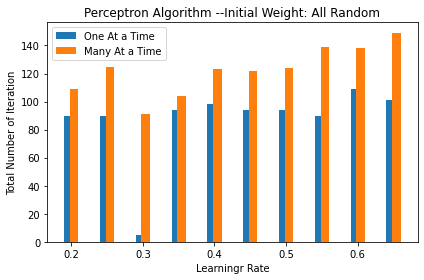

In [ ]:
"""
Course name:Pattern Recognition
Course no:Cse-4214
Experiment name_2:“Implementing the Perceptron algorithm for finding the weights of a Linear Discriminant function.” 
Name:Nadia Hossain

"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rnd;
from prettytable import PrettyTable

# ------------task-1-start-----------
data = pd.read_csv('train.txt', sep=" " ,  header = None)
value=data.values
print(len(value))

data.columns=['X', 'Y', 'Class']
print('\nTraining data points')
print(data)

c1x=[]
c1y=[]
c2x=[]
c2y=[]

for i in range(len(value)):
    if (value[i][2]==1):
     c1x.append(value[i][0])
     c1y.append(value[i][1])
    else:
     c2x.append(value[i][0])
     c2y.append(value[i][1])

# for plotting training dataset
plt.scatter(c1x, c1y, color = 'red', marker='*',label='train_Class1Points')#to plot data points on horizontal and vertical axis
plt.scatter(c2x, c2y, color = 'black', marker='^',label='train_Class2Points')#to plot data points on horizontal and vertical axis
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Perceptron Class')
plt.legend() #adding the legend to the plot.
plt.show()
# ------------task-1-end----------- 


#----------------TASK-2-START--------------
#------FOR Normalization negating class 2
Y_H_D=[]
for i in range(len(value)):
    if value[i][2] == 1:
        Y_H_D.append(value[i][0] **2)
        Y_H_D.append(value[i][1] **2)
        Y_H_D.append(value[i][0]*value[i][1])
        Y_H_D.append(value[i][0])
        Y_H_D.append(value[i][1])
        Y_H_D.append(1)
        
for i in range(len(value)):
    if value[i][2] == 2:
        Y_H_D.append((value[i][0] **2) * -1)
        Y_H_D.append((value[i][1] **2) * -1)
        Y_H_D.append(value[i][0] *value[i][1] *-1)
        Y_H_D.append(value[i][0] * -1)
        Y_H_D.append(value[i][1] * -1)
        Y_H_D.append(-1)

Y_H_D=np.resize(Y_H_D, (len(value), 6))

print("Higher Dimension points Y\n",)
print(Y_H_D)
#---------------TASK-2--END------------------


#------------Task 3 AND Task 4 start-------
#single update for initial weight 1

single_it=[]     #total iteration
learning_rate=.1
learning_rate_list1=[]


limit=200
while True:
  init_w=[1,1,1,1,1,1] # initial weght 1
  counter=0
  n=0
  for i in range(limit):
    n=n+1
    sum_w=[0,0,0,0,0,0]
    counter=0
    for j in range(len(value)):
      g=np.dot(Y_H_D[j,:],init_w)    #decision boundary for perceptron,if g<=0 then missclassified and update weight1661
      if g <= 0: 
        sum_w = init_w+learning_rate*Y_H_D[j,:]
        init_w=sum_w
        #counter=0
      else:
        counter=counter+1
        
    
    if counter==len(value):
             break
             
  single_it.append(i+1)
  

      
  learning_rate += .1
  #print(single_it)
  if learning_rate>1:
             break



#batch update process for initial weight 1
batch_it=[]
learning_rate_list2=[]
learning_rate=.1
while True:
  init_w=[1,1,1,1,1,1]    # initial weight 1
  for i in range(limit):
    counter=0
    sum_w=[0,0,0,0,0,0]
    for j in range(len(value)):
      g=np.dot(Y_H_D[j,:],init_w)
      if g <= 0:
        sum_w +=learning_rate*Y_H_D[j,:]
      else:
        counter=counter+1
    
    init_w=sum_w+init_w
    if counter==len(value):
             break
  batch_it.append(i+1)
 # learning_rate_list2.append(learning_rate)
      
  learning_rate += .1
 # print(batch_it)
  if learning_rate>1:
             break


#to show the iterarons in table
learning_rate_list= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
my_pretty_table= PrettyTable(['Alpha ( Learning Rate )', 'One at a Time','Many at a Time'])

for i in range(len(learning_rate_list)):
   my_pretty_table.add_row([ learning_rate_list[i], single_it[i], batch_it[i] ])

print("\n")
print("\n\t\t Initial Weight Vector All One ")
print(my_pretty_table)



# plotting berchart for  sigle update and batch update  for inital weight 1
to_label = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1']

x = np.arange(len(to_label))  
width = 0.33  

fig, axes = plt.subplots()
rects1 = axes.bar(x - width/2, single_it, width, label='One At a Time')
rects2 = axes.bar(x + width/2, batch_it, width, label='Many At a Time')
axes.set_ylabel('Total Number of Iteration')
axes.set_xlabel('Learningr Rate')
axes.set_title('Perceptron Algorithm --Initial Weight: All Ones')
axes.set_xticklabels(to_label)
axes.legend()

fig.tight_layout()
plt.show()

print("\n\n")
#------------------

#single update for initial weight 0

single_it0=[]     #total iteration
learning_rate=.1
limit=500
while True:
  init_w=[0,0,0,0,0,0] # initial weght 0
  counter=0
  n=0
  for i in range(limit):
    n=n+1
    sum_w=[0,0,0,0,0,0]
    counter=0
    for j in range(len(value)):
      g=np.dot(Y_H_D[j,:],init_w)    
      if g <= 0: 
        sum_w = init_w+learning_rate*Y_H_D[j,:]
        init_w=sum_w
        #counter=0
      else:
        counter=counter+1
        
    
    if counter==len(value):
             break
             
  single_it0.append(i+1)

      
  learning_rate += .1
 # print(to_it0)
  if learning_rate>1:
             break
#batch update for initial weight 0
batch_it0=[]
learning_rate=.1
while True:
  init_w=[0,0,0,0,0,0]
  for i in range(limit):
    counter=0
    sum_w=[0,0,0,0,0,0]
    for j in range(len(value)):
      g=np.dot(Y_H_D[j,:],init_w)
      if g <= 0:
        sum_w +=learning_rate*Y_H_D[j,:]
      else:
        counter=counter+1
    
    init_w=sum_w+init_w
    if counter==len(value):
             break
  batch_it0.append(i+1)
      
  learning_rate += .1
  #print(total_it0)
  if learning_rate>1:
             break



#to show the iterarons in table
learning_rate_list= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
my_pretty_table0= PrettyTable(['Alpha ( Learning Rate )', 'One at a Time','Many at a Time'])

for i in range(len(learning_rate_list)):
   my_pretty_table0.add_row([ learning_rate_list[i], single_it0[i], batch_it0[i] ])


print("\n\t\t Initial Weight Vector All Zero ")
print(my_pretty_table0)

# plotting berchart for  sigle update and batch update  for inital weight All 0

to_label = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1']

x = np.arange(len(to_label))  
width = 0.33  

fig, axes = plt.subplots()
rects1 = axes.bar(x - width/3, single_it0, width, label='One At a Time')
rects2 = axes.bar(x + width/3, batch_it0, width, label='Many At a Time')
axes.set_ylabel('Total Number of Iteration')
axes.set_xlabel('Learningr Rate')
axes.set_title('Perceptron Algorithm --Initial Weight: All Zeros')
axes.set_xticklabels(to_label)
axes.legend()
fig.tight_layout()
plt.show()

print("\n\n")


# single update for initial wweight random value
single_it_rand=[]
learning_rate=.1
while True:

  np.random.seed(123)
  w_r= np.random.random(np.array(6))
  init_w=w_r
  counter=0
  n=0
  for i in range(limit):
    n=n+1
    sum_w=[0,0,0,0,0,0]
    counter=0
    for j in range(len(value)):
      g=np.dot(Y_H_D[j,:],init_w)
      if g <= 0:
        sum_w = init_w+learning_rate*Y_H_D[j,:]
        init_w=sum_w
        #counter=0
      else:
        counter=counter+1
        
    
    if counter==len(value):
             break
             
  single_it_rand.append(i+1)

      
  learning_rate += .1
  #print(to_it_rand)
  if learning_rate>1:
             break

#batch update for inital weight random value
batch_it_rand=[]
learning_rate=.1
while True:
  np.random.seed(123)
  w_r= np.random.random(np.array(6))
  init_w=w_r
  for i in range(limit):
    counter=0
    sum_w=[0,0,0,0,0,0]
    for j in range(len(value)):
      g=np.dot(Y_H_D[j,:],init_w)
      if g <= 0:
        sum_w +=learning_rate*Y_H_D[j,:]
      else:
        counter=counter+1
    
    init_w=sum_w+init_w
    if counter==len(value):
             break
  batch_it_rand.append(i+1)
      
  learning_rate += .1
  #print(total_it_rand)
  if learning_rate>1:
             break

#to show the iterarons in table
learning_rate_list= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
my_pretty_table_rand= PrettyTable(['Alpha ( Learning Rate )', 'One at a Time','Many at a Time'])

for i in range(len(learning_rate_list)):
   my_pretty_table_rand.add_row([ learning_rate_list[i], single_it_rand[i], batch_it_rand[i] ])


print("\n\t\t Initial Weight Vector All Random ")
print(my_pretty_table_rand)

# plotting berchart for  sigle update and batch update  for inital weight random
to_label = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1']

x = np.arange(len(to_label))  
width = 0.24  

fig, axes = plt.subplots()
rects1 = axes.bar(x - width/3, single_it_rand, width, label='One At a Time')
rects2 = axes.bar(x + width/3, batch_it_rand, width, label='Many At a Time')
axes.set_ylabel('Total Number of Iteration')
axes.set_xlabel('Learningr Rate')
axes.set_title('Perceptron Algorithm --Initial Weight: All Random')
axes.set_xticklabels(to_label)
axes.legend()

fig.tight_layout()
plt.show()

print("\n\n")
